In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('hyperparametertuning_1285946.csv', sep=',')
df.head()

,Learning rate,Batch size,Dropout rate,Penalized BLEU score,Total training time in seconds
0,0.000010,128,0.3,70.000,2329.99
1,0.000050,128,0.3,70.760,2430.23
2,0.000080,128,0.3,5.860,805.22
3,0.000100,128,0.3,1.828,1393.67
4,0.000001,128,0.3,21.866,680.84


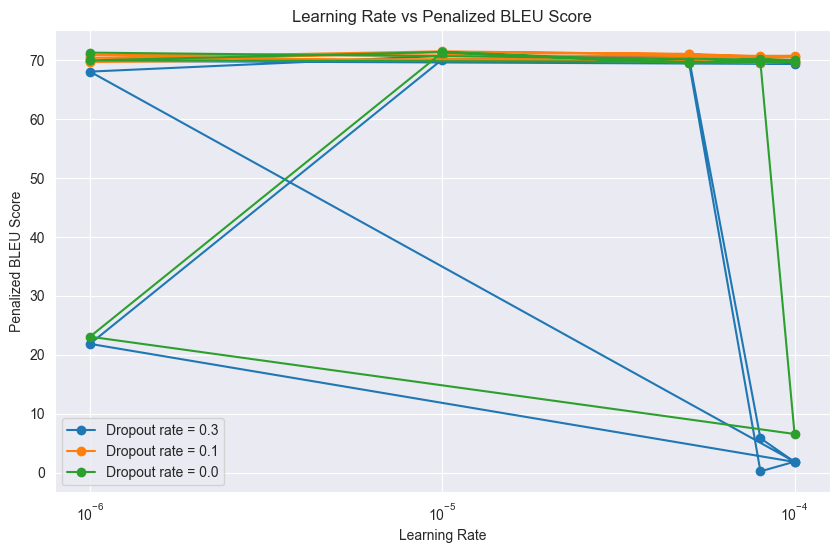

In [25]:


# Plot 1: Line Plot (Learning Rate vs BLEU Score)
plt.figure(figsize=(10, 6))
for dropout in df['Dropout rate'].unique():
    subset = df[df['Dropout rate'] == dropout]
    plt.plot(subset['Learning rate'], subset['Penalized BLEU score'], marker='o', label=f'Dropout rate = {dropout}')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Penalized BLEU Score')
plt.title('Learning Rate vs Penalized BLEU Score')
plt.legend()
plt.grid(True)
plt.show()

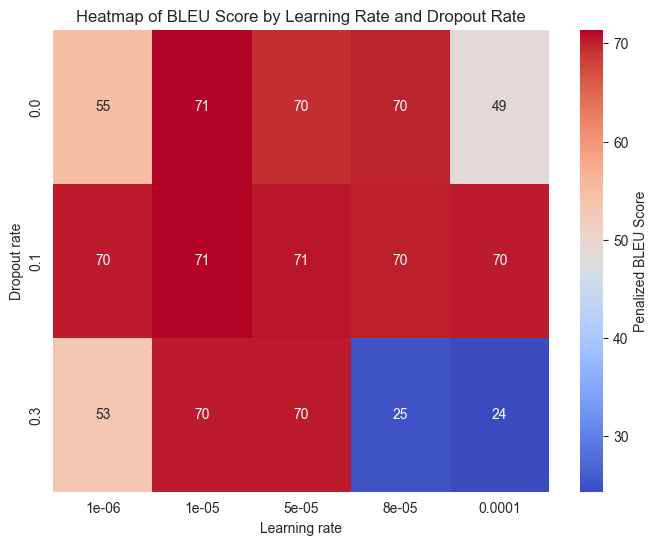

In [26]:
# Aggregating duplicate entries by taking the mean of the BLEU scores
df_aggregated = df.groupby(['Dropout rate', 'Learning rate']).mean().reset_index()

# Now create the pivot table
pivot_table = df_aggregated.pivot(index='Dropout rate', columns='Learning rate', values='Penalized BLEU score')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', cbar_kws={'label': 'Penalized BLEU Score'})
plt.title('Heatmap of BLEU Score by Learning Rate and Dropout Rate')
plt.show()


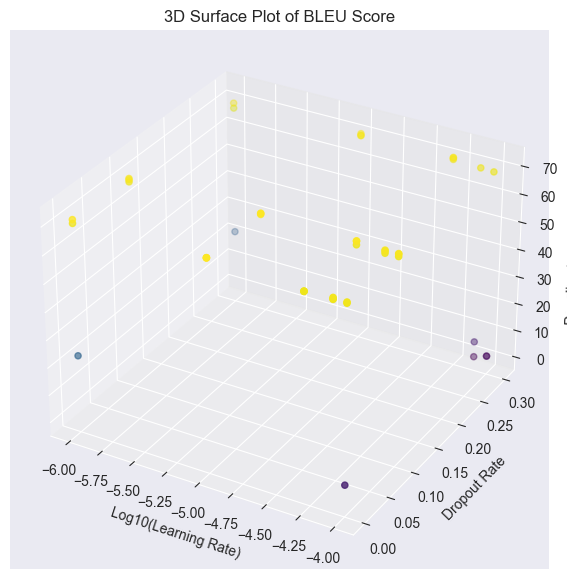

In [27]:

# Plot 3: 3D Surface Plot (Learning Rate vs Dropout Rate vs BLEU Score)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.log10(df['Learning rate']), df['Dropout rate'], df['Penalized BLEU score'], c=df['Penalized BLEU score'], cmap='viridis')

ax.set_xlabel('Log10(Learning Rate)')
ax.set_ylabel('Dropout Rate')
ax.set_zlabel('Penalized BLEU Score')
ax.set_title('3D Surface Plot of BLEU Score')
plt.show()

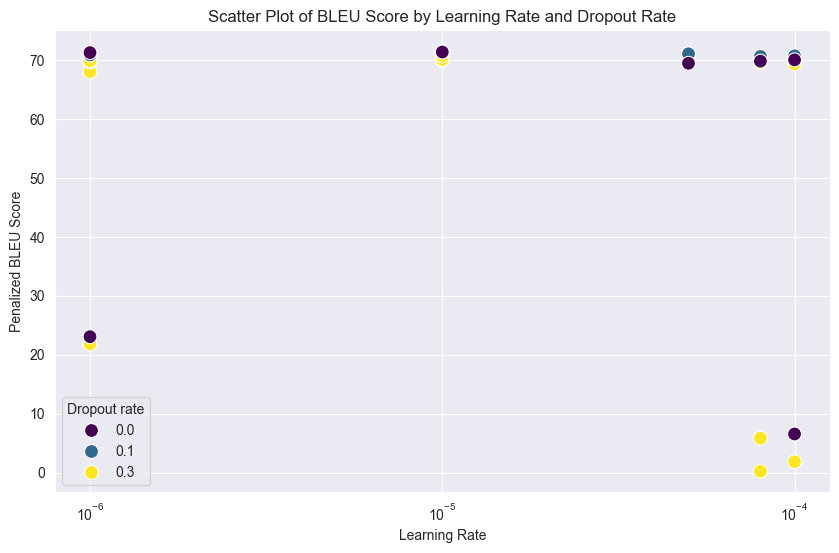

In [28]:
# Plot 4: Scatter Plot (Learning Rate vs BLEU Score with Dropout Rate as Color)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Learning rate', y='Penalized BLEU score', hue='Dropout rate', palette='viridis', s=100)
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Penalized BLEU Score')
plt.title('Scatter Plot of BLEU Score by Learning Rate and Dropout Rate')
plt.grid(True)
plt.show()

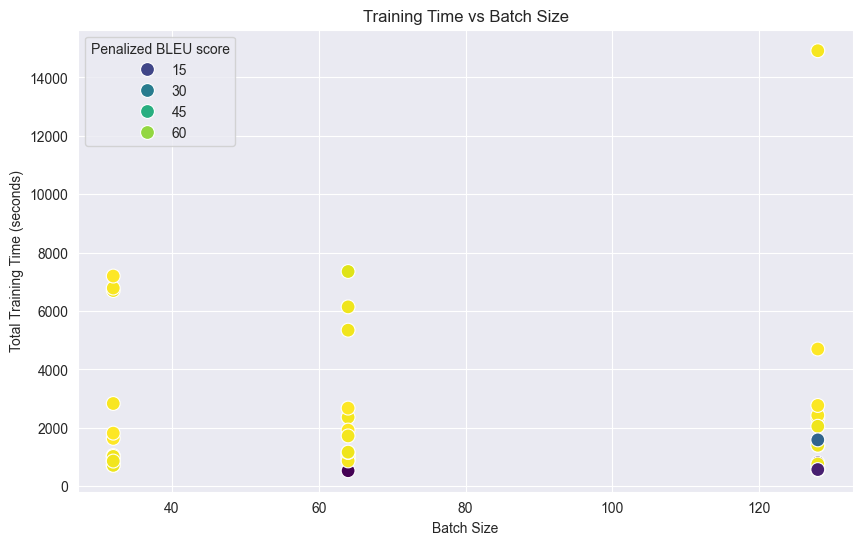

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Batch size', y='Total training time in seconds', hue='Penalized BLEU score', palette='viridis', s=100)
plt.xlabel('Batch Size')
plt.ylabel('Total Training Time (seconds)')
plt.title('Training Time vs Batch Size')
plt.grid(True)
plt.show()

In [30]:
best_params = df.loc[df['Penalized BLEU score'].idxmax()]

print("Best BLEU Score Parameters:")
print(best_params)

Best BLEU Score Parameters:
Learning rate                        0.00001
Batch size                          64.00000
Dropout rate                         0.10000
Penalized BLEU score                71.50800
Total training time in seconds    1923.18000
Name: 20, dtype: float64
